<a href="https://colab.research.google.com/github/skywalker0803r/crypto/blob/main/%E5%BC%B7%E5%8C%96%E5%AD%B8%E7%BF%92%E4%BA%A4%E6%98%93%E6%A9%9F%E5%99%A8%E4%BA%BA%E5%8F%AF%E8%A1%8C%E6%80%A7%E8%A9%95%E4%BC%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
!pip install finlab_crypto
!pip install finta
!pip install pandas-ta
!pip install stable-baselines3

     |████████████████████████████████| 153kB 27.6MB/s 


In [241]:
import matplotlib.pyplot as plt
from binance.client import Client
import finlab_crypto
from finta import TA
import seaborn as sns
from pandas_ta.overlap.supertrend import supertrend
import pandas as pd
import numpy as np
import random
import gym
from gym import spaces
import warnings 
warnings.filterwarnings('ignore')

# craw ohlcv from binance

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,,
2021-07-01 02:34:00+00:00,1.625107e+12,34336.41,34353.89,34300.26,34322.13,61.609759,1.625107e+12,2.114967e+06,847.0,35.403225,1.215349e+06,0.0
2021-07-01 02:35:00+00:00,1.625107e+12,34328.43,34358.47,34304.64,34346.02,78.564201,1.625107e+12,2.697540e+06,914.0,44.126380,1.515356e+06,0.0
2021-07-01 02:36:00+00:00,1.625107e+12,34350.01,34382.01,34346.03,34354.87,24.857518,1.625107e+12,8.541717e+05,630.0,14.471629,4.973205e+05,0.0
2021-07-01 02:37:00+00:00,1.625107e+12,34354.86,34380.01,34354.86,34374.01,28.671166,1.625107e+12,9.854475e+05,586.0,17.801730,6.118475e+05,0.0
2021-07-01 02:38:00+00:00,1.625107e+12,34371.90,34413.15,34368.00,34400.30,175.456768,1.625107e+12,6.035507e+06,901.0,40.297880,1.386126e+06,0.0


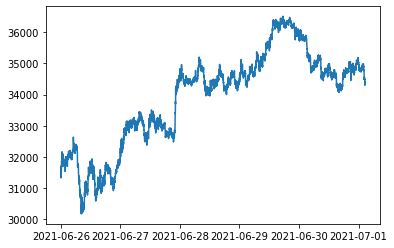

In [84]:
api_key = '7P3fkeGPMWI1Cxfaje9Kdds1E3B0BHL8gL8Q8QH6pSvo3OuctGZroiyABMyLdTUs'
api_secret = 'UHVvoIowzhnTdhtjPX7VWkMdnf6M4SmMfAO4qQ7X9GHhQQ3Vha9FLEUxls02BGAe'
ohlcv = finlab_crypto.crawler.get_nbars_binance(
    symbol='BTCUSDT',
    interval='1m',
    nbars=5000,
    client=Client(api_key, api_secret)
    )
display(ohlcv.tail())
plt.plot(ohlcv['close'])

# Define State

1.RSI

-0.5 0.5000000000000002
7353


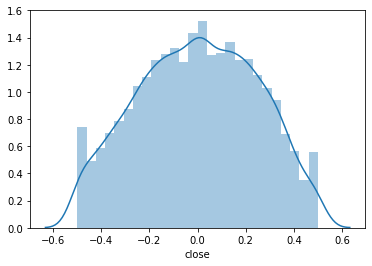

In [85]:
def get_rsi(df):
  Absolute_increase = (df['close']/df['close'].shift(1))-1 
  Absolute_increase[Absolute_increase<0] = 0 
  Absolute_drop = (-1) * ((df['close']/df['close'].shift(1))-1) 
  Absolute_drop[Absolute_drop<0] = 0 
  UPt = Absolute_increase.rolling(6).mean()
  DNt = Absolute_drop.rolling(6).mean()
  rsi = 100 * UPt / (UPt+DNt)
  adjust_rsi = (rsi / 100) - 0.5
  return adjust_rsi
rsi = get_rsi(ohlcv) 
print(rsi.min(),rsi.max())
print(len(rsi.dropna()))
sns.distplot(rsi.dropna())

2.Williams %R

-0.5 0.5
7351


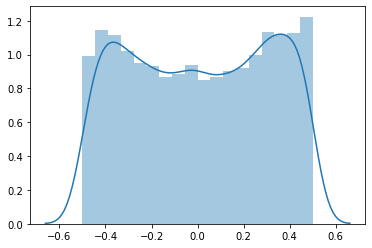

In [86]:
def get_williams(df):
  Highest_price_in_the_last_days = df['high'].rolling(9).max()
  Lowest_price_in_the_last_days = df['low'].rolling(9).min()
  williams = (Highest_price_in_the_last_days-df['close'])/(Highest_price_in_the_last_days-Lowest_price_in_the_last_days)
  williams = williams * -100
  adjust_williams = (williams / -100) - 0.5
  return adjust_williams
williams = get_williams(ohlcv)
print(williams.min(),williams.max())
print(len(williams.dropna()))
sns.distplot(williams.dropna())

3.CCI

-2.0735381941326834 2.7683480045011573
7358


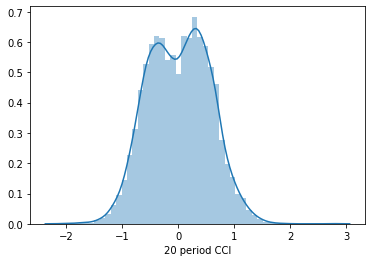

In [87]:
def get_cci(df):
  cci = TA.CCI(df)
  adjust_cci = cci / 200
  return adjust_cci
cci = get_cci(ohlcv)
print(cci.min(),cci.max())
print(len(cci.dropna()))
sns.distplot(cci.dropna())

4.CMO

-1.0 0.8003114229255214
7358


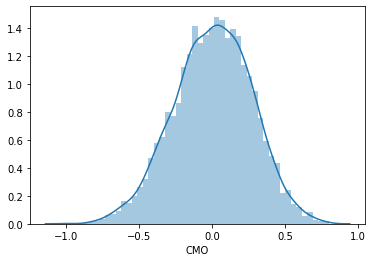

In [88]:
def get_cmo(df):
  cmo = TA.CMO(df)
  adjust_cmo = cmo / 100
  return adjust_cmo
cmo = get_cmo(ohlcv)
print(cmo.min(),cmo.max())
print(len(cmo.dropna()))
sns.distplot(cmo.dropna())

5.MACD

-0.5902142556088095 0.661482416498265
7359


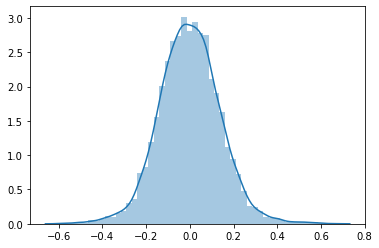

In [100]:
def get_macd(df):
  macd = TA.MACD(df)['MACD'] - TA.MACD(df)['SIGNAL']
  adjust_macd = macd/100
  return adjust_macd
macd = get_macd(ohlcv)
print(macd.min(),macd.max())
print(len(macd.dropna()))
sns.distplot(macd.dropna())

6.PPO

7359
count    7359.000000
mean       -0.001392
std         0.420305
min        -1.893288
25%        -0.267794
50%        -0.005513
75%         0.252855
max         2.172969
dtype: float64


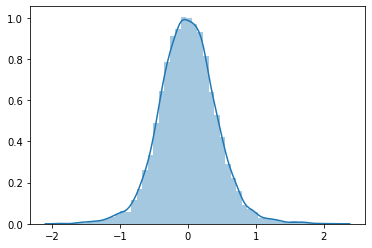

In [115]:
def get_ppo(df):
  ppo = TA.PPO(df)['PPO'] - TA.PPO(df)['SIGNAL']
  adjust_ppo = ppo*10
  return adjust_ppo
ppo = get_ppo(ohlcv)
print(len(ppo.dropna()))
print(ppo.describe())
sns.distplot(ppo.dropna())

7.ROC

count    7347.000000
mean        0.015241
std         0.433517
min        -1.904010
25%        -0.237045
50%         0.014013
75%         0.260411
max         2.753089
Name: ROC, dtype: float64


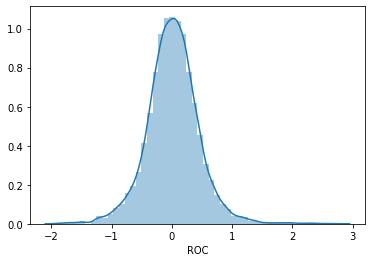

In [108]:
def get_roc(df):
  roc = TA.ROC(df)
  return roc
roc = get_roc(ohlcv)
print(roc.describe())
sns.distplot(roc.dropna())

8.DMI

count    7346.000000
mean        0.025236
std         0.305149
min        -1.146693
25%        -0.166564
50%         0.034200
75%         0.219797
max         2.118425
dtype: float64


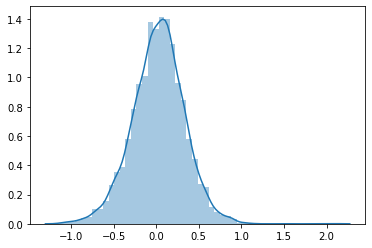

In [116]:
def get_dmi(df):
  dmi = TA.DMI(df)['DI+'] - TA.DMI(df)['DI-']
  adjust_dmi = dmi/50
  return adjust_dmi
dmi = get_dmi(ohlcv)
print(dmi.describe())
sns.distplot(dmi.dropna())

9.trix

count    7358.000000
mean        0.012141
std         0.173434
min        -0.981568
25%        -0.073530
50%         0.013804
75%         0.100147
max         1.064639
Name: 20 period TRIX, dtype: float64


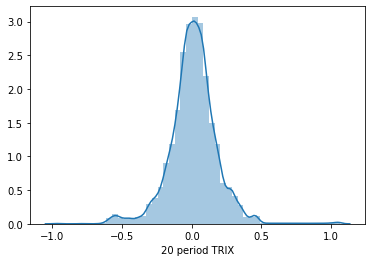

In [119]:
def get_trix(df):
  trix = TA.TRIX(df)
  adjust_trix = trix*10
  return adjust_trix
trix = get_trix(ohlcv)
print(trix.describe())
sns.distplot(trix.dropna())

10.supertrend

count    7359.000000
mean       -0.016239
std         0.499770
min        -0.500000
25%        -0.500000
50%        -0.500000
75%         0.500000
max         0.500000
Name: SUPERTd_3_1.0, dtype: float64


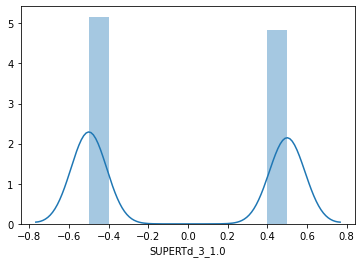

In [178]:
def get_supertrend(df,length=3,multiplier=1):
  sup = supertrend(df['high'],df['low'],df['close'],length=length,multiplier=multiplier)[f'SUPERTd_{length}_{multiplier}.0']
  adjust_sup = sup*0.5
  return adjust_sup
sup = get_supertrend(ohlcv)
print(sup.describe())
sns.distplot(sup.dropna())

In [179]:
def ohlcv2state(ohlcv):
  state = pd.DataFrame()
  state['rsi'] = get_rsi(ohlcv) #1
  state['Williams'] = get_williams(ohlcv) #2
  state['cci'] = get_cci(ohlcv) #3
  state['cmo'] = get_cmo(ohlcv) #4
  state['macd'] = get_macd(ohlcv) #5
  state['ppo'] = get_ppo(ohlcv) # 6
  state['roc'] = get_roc(ohlcv) # 7
  state['dmi'] = get_dmi(ohlcv) # 8
  state['trix'] = get_trix(ohlcv) # 9
  state['supertrend1'] = get_supertrend(ohlcv,length=3,multiplier=1) # 10
  state['supertrend2'] = get_supertrend(ohlcv,length=10,multiplier=3) # 11
  state = state.fillna(0).astype(np.float32)
  return state

In [180]:
state = ohlcv2state(ohlcv)
state

,rsi,Williams,cci,cmo,macd,ppo,roc,dmi,trix,supertrend1,supertrend2
timestamp,,,,,,,,,,,
2021-06-26 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.5
2021-06-26 00:01:00+00:00,0.000000,0.000000,-0.333333,-1.000000,-0.021422,-0.067812,0.000000,0.000000,-0.981568,0.5,0.5
2021-06-26 00:02:00+00:00,0.000000,0.000000,-0.500000,-1.000000,-0.048889,-0.155366,0.000000,0.000000,-0.957613,0.5,0.5
2021-06-26 00:03:00+00:00,0.000000,0.000000,-0.316993,-0.624791,-0.031716,-0.100983,0.000000,0.000000,-0.792706,0.5,0.5
2021-06-26 00:04:00+00:00,0.000000,0.000000,-0.274995,-0.624802,-0.020324,-0.064840,0.000000,0.000000,-0.659477,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01 02:34:00+00:00,-0.340936,0.248422,-0.698141,-0.485871,-0.056725,-0.168782,-0.618749,-0.507997,-0.345913,-0.5,-0.5
2021-07-01 02:35:00+00:00,-0.257681,0.165109,-0.536340,-0.370466,-0.024620,-0.075656,-0.388573,-0.462568,-0.351525,-0.5,-0.5
2021-07-01 02:36:00+00:00,0.189454,0.134246,-0.366913,-0.328010,0.011156,0.028252,-0.347704,-0.382994,-0.355466,-0.5,-0.5


## Visualization states

100%|██████████| 7348/7348 [00:00<00:00, 7352.35it/s]


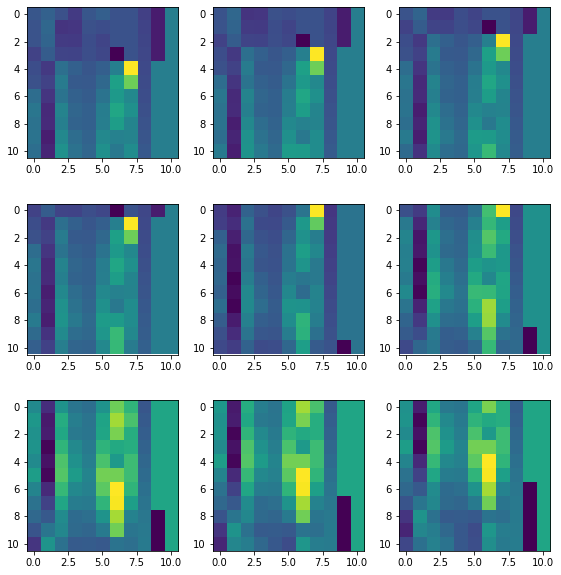

In [188]:
from tqdm import tqdm
import numpy as np

days = 11
Xs = []

for i in tqdm(range(0,len(ohlcv)-days,1)):
  Xs.append(np.array(state.iloc[i:i+days,:]))
Xs = np.array(Xs)

%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
j = 1
for i in range(9,18):
    plt.subplot(330 + (j))
    plt.imshow(Xs[i])
    j +=1

In [189]:
Xs.shape

(7348, 11, 11)

# TradingEnv

In [442]:
class TradingEnv(gym.Env):
  def __init__(self,df):
    super(TradingEnv, self).__init__()
    self.df = df
    self.state_sequence = ohlcv2state(self.df)
    # buy,sell amount%[0%-100%]
    self.action_space = spaces.Box(low=np.array([0.0, 0.0]), high=np.array([1.0,1.0]), dtype=np.float32)
    
    # time_dim,features_dim
    self.time_length = 11
    self.features_dim = 11
    self.observation_space = spaces.Box(low=-np.inf,high=np.inf, shape=(1,self.time_length,self.features_dim), dtype=np.float32)
    self.INITIAL_ACCOUNT_BALANCE = 1000000
  
  def _next_observation(self):
    state = self.state_sequence.iloc[self.current_step:self.current_step+self.time_length,:]
    return np.array(state).reshape(1,self.time_length,self.features_dim).astype(np.float32)
  
  def reset(self):
    self.balance = self.INITIAL_ACCOUNT_BALANCE
    self.net_worth = self.INITIAL_ACCOUNT_BALANCE
    self.prev_net_worth = self.INITIAL_ACCOUNT_BALANCE
    self.shares_held = 0
    self.current_step = random.randint(0,len(self.df)-self.time_length)
    return self._next_observation()
  
  def render(self):
    profit = self.net_worth - self.INITIAL_ACCOUNT_BALANCE
    print(f'Step: {self.current_step}')
    print(f'Profit: {profit}')
  
  def step(self, action):
    self._take_action(action) # update net_worth
    self.current_step += 1
    if self.current_step > len(self.df) - self.time_length:
      self.current_step = 0
    reward = self.net_worth - self.prev_net_worth
    self.prev_net_worth = self.net_worth # update prev_net_worth
    done = self.net_worth <= 0
    obs = self._next_observation()
    return obs, reward, done, {}
  
  def _take_action(self, action):
    current_price = random.uniform(self.df.iloc[self.current_step]['open'], self.df.iloc[self.current_step]['close'])
    action_type = action[0]
    amount = action[1]
    if action_type == 0:
      total_possible = int(self.balance / current_price) # calculate total_possible buy how many btc
      shares_bought = int(total_possible * amount) # buy btc
      self.balance -= shares_bought * current_price # update usdt
      self.shares_held += shares_bought # update btc
      self.net_worth = self.balance + self.shares_held * current_price # update total asset
    if action_type == 1:
      shares_sold = self.shares_held * amount # sell btc
      self.balance += shares_sold * current_price # update usdt
      self.shares_held -= shares_sold # update btc
      self.net_worth = self.balance + self.shares_held * current_price # update total asset

In [443]:
df = finlab_crypto.crawler.get_nbars_binance(
        symbol='BTCUSDT',
        interval='1h',
        nbars=20000,
        client=Client(api_key, api_secret))
print(df.shape)
df

(20001, 12)


,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,,
2019-03-19 00:00:00+00:00,1.552954e+12,3987.83,3999.40,3983.14,3998.01,676.115918,1.552957e+12,2.700312e+06,5238.0,468.706015,1.872056e+06,0.0
2019-03-19 01:00:00+00:00,1.552957e+12,3997.89,4002.99,3990.37,3993.00,669.039765,1.552961e+12,2.673681e+06,5565.0,395.891323,1.582146e+06,0.0
2019-03-19 02:00:00+00:00,1.552961e+12,3992.44,4001.79,3991.72,3994.00,719.930551,1.552964e+12,2.877954e+06,5070.0,366.837591,1.466371e+06,0.0
2019-03-19 03:00:00+00:00,1.552964e+12,3994.00,3998.87,3986.14,3987.45,622.405499,1.552968e+12,2.485161e+06,4547.0,349.301564,1.394696e+06,0.0
2019-03-19 04:00:00+00:00,1.552968e+12,3987.52,3991.99,3970.00,3977.72,941.065335,1.552972e+12,3.744919e+06,6648.0,392.787679,1.563270e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01 02:00:00+00:00,1.625105e+12,34936.43,34966.53,34223.15,34299.59,3787.824933,1.625108e+12,1.305509e+08,59229.0,1677.103197,5.779126e+07,0.0
2021-07-01 03:00:00+00:00,1.625108e+12,34299.58,34403.55,34120.00,34120.01,1797.404599,1.625112e+12,6.157258e+07,34643.0,808.082662,2.768605e+07,0.0
2021-07-01 04:00:00+00:00,1.625112e+12,34120.01,34338.03,34061.16,34330.34,1935.266555,1.625116e+12,6.621594e+07,35895.0,931.466330,3.187077e+07,0.0


In [444]:
int(len(df)/2)

10000

In [445]:
train_df = df.iloc[:10000]
test_df = df.iloc[10000:]

In [446]:
env = TradingEnv(train_df)

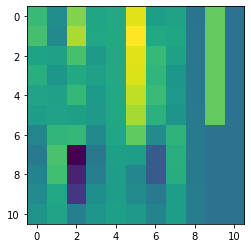

In [447]:
plt.imshow(env.reset()[0,:,:])

In [448]:
from stable_baselines3.common.env_checker import check_env
check_env(env)

In [449]:
import gym
import torch as th
import torch.nn as nn

from stable_baselines3 import PPO
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor


class CustomCNN(BaseFeaturesExtractor):
    """
    :param observation_space: (gym.Space)
    :param features_dim: (int) Number of features extracted.
        This corresponds to the number of unit for the last layer.
    """

    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 256):
        super(CustomCNN, self).__init__(observation_space, features_dim)
        # We assume CxHxW images (channels first)
        # Re-ordering will be done by pre-preprocessing or wrapper
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 32, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)),
            nn.Dropout(0.25),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with th.no_grad():
            n_flatten = self.cnn(
                th.as_tensor(observation_space.sample()[None]).float()
            ).shape[1]

        self.linear = nn.Sequential(
            nn.Linear(n_flatten, features_dim),
            )

    def forward(self, observations: th.Tensor) -> th.Tensor:
        return self.linear(self.cnn(observations))

policy_kwargs = dict(
    features_extractor_class=CustomCNN,
    features_extractor_kwargs=dict(features_dim=128),
)

model = PPO("CnnPolicy", env, policy_kwargs=policy_kwargs, verbose=1)
model.learn(25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------------
| time/                   |           |
|    fps                  | 723       |
|    iterations           | 1         |
|    time_elapsed         | 2         |
|    total_timesteps      | 2048      |
| train/                  |           |
|    approx_kl            | 3191.5654 |
|    clip_fraction        | 0.99      |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.84     |
|    explained_variance   | -1.65     |
|    learning_rate        | 0.0003    |
|    loss                 | 2.24e+10  |
|    n_updates            | 130       |
|    policy_gradient_loss | 0.266     |
|    std                  | 1         |
|    value_loss           | 5.2e+10   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 269       |
|    iterations           

In [450]:
from tqdm import tqdm_notebook as tqdm
def evaluate(n=10,df=None):
  for j in range(n):
    env = TradingEnv(df)
    obs = env.reset()
    frames = []
    total_reward = 0
    for i in tqdm(range(1000)):
      action, _states = model.predict(obs)
      obs, rewards, dones, info = env.step(action)
      total_reward += rewards
      frames.append(total_reward)
    plt.plot(pd.Series(frames).rolling(30).mean(),label=str(j))
  plt.legend()
  plt.show()

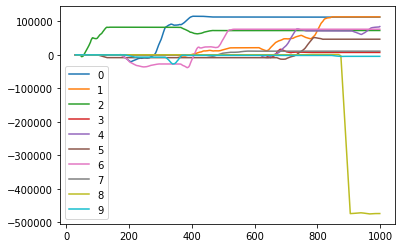

In [451]:
evaluate(n=10,df=train_df)

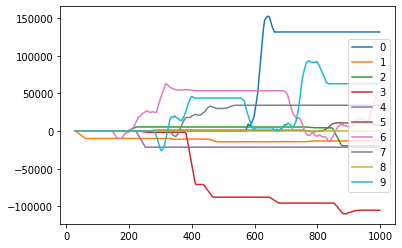

In [452]:
evaluate(n=10,df=test_df)